# **APL SURP Python course** - Notebook 3 (completed version)

***Line and scatter plots, depth profiles, timeseries data, logical operations, if statements and for loops and more***

*Created for the University of Washington Applied Physics Laboratory's Summer Undergraduate Research Program (SURP) 2025.*

For additional resources on Python basics, you can consult the following resources on the APL-SURP Python course website:
* Tutorials on Python fundamentals: https://uw-apl-surp.github.io/aplsurp-python/overview.html
* Complementary lessons on specific Python topics: https://uw-apl-surp.github.io/aplsurp-python/complementary_lessons.html

In [1]:
import numpy as np                         # NumPy is an array and math library
import matplotlib.pyplot as plt            # Matplotlib is a visualization (plotting) library
import pandas as pd                        # Pandas lets us work with spreadsheet (.csv) data
from datetime import datetime, timedelta   # Datetime helps us work with dates and times

## Part 1: Line and scatter plots

It's time for us to start creating visualizations of data, called **plots**.

At the top of this page, we imported the package Matplotlib using:

```python
import matplotlib.pyplot as plt
```

Creating a **line plot** is simple. We use the Matplotlib function **`plt.plot()`**. The basic form of the function is:

> **`plt.plot(X, Y, <FORMAT_ARGUMENTS>...)`**

Here, `X` and `Y` should be 1-D lists or arrays of data. The options for `<FORMAT_ARGUMENTS>` can be found on [Matplotlib's documentation webpage](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

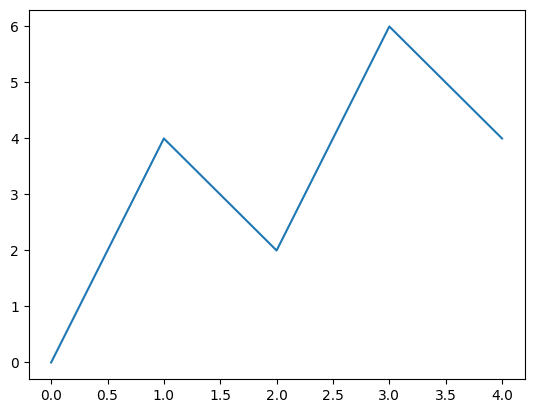

In [2]:
x = np.array([0,1,2,3,4])
y = np.array([0,4,2,6,4])

plt.plot(x,y)

Some formatting arguments include:
* `c` or `color`: line color (options: `'k'` or `'black'` for black, `'red'` for red, etc. – see [this page](https://matplotlib.org/stable/gallery/color/named_colors.html) for color options)
* `lw` or `linewidth`: line width (a number; the default is 1.5)
* `ls` or `linestyle`: line style (options: `'-', '--', '-.', ':'`)
* `marker`: optional marker style (options: `'.', 'o', 'v', '^', '<', '>', 's', '*',` etc.)
* `ms` or `markersize`: optional marker size (a number)

***Try plotting x versus y again, except this time use a "goldenrod"-colored dashed line of width 2.5 with star-shaped markers of size 20:***

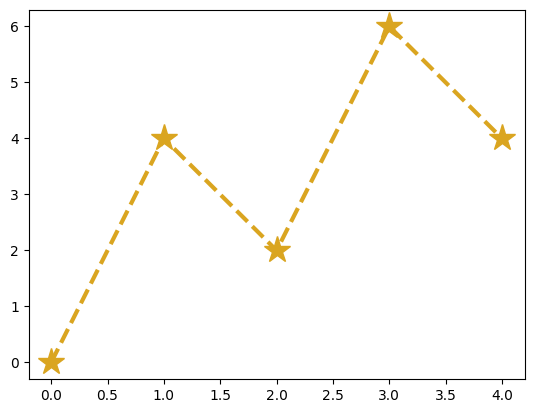

In [3]:
# Write your code here:
plt.plot(x, y, color='goldenrod', lw=3, ls='--', marker='*', ms=20)

Some other options include changing the figure size by starting with a call to:

> **`plt.figure(figsize=(WIDTH,HEIGHT))`**

Adding x-axis and y-axis labels and a title at the top:

> **``plt.xlabel(STRING)``**

> **``plt.ylabel(STRING)``**

> **``plt.title(STRING)``**

Adding grid lines using:

> **`plt.grid()`**

Or adding a plot legend by specifying the **`label`** argument in `plt.plot()` and adding using:

> **`plt.legend()`**

Check out these additional formatting options below:

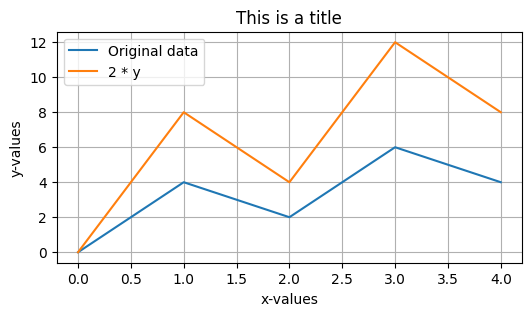

In [4]:
plt.figure(figsize=(6,3))
plt.plot(x, y, label='Original data')
plt.plot(x, 2*y, label='2 * y')   # y-values are multiplied by 2 here
plt.legend()
plt.grid()
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('This is a title');

We can also create a **scatter plot** with just the points (no line). The function is similar to `plt.plot()`:

> **`plt.scatter(X, Y, s=SIZE, c=COLOR, marker=MARKER_STYLE, etc.)`**

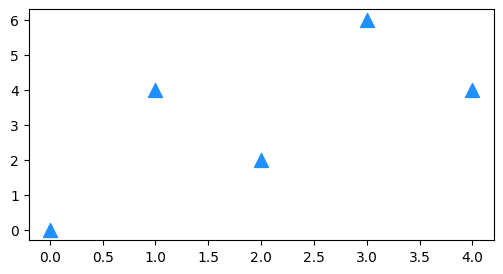

In [5]:
plt.figure(figsize=(6,3))
plt.scatter(x, y, s=100, c='dodgerblue', marker='^');

---

***Let's bring it all together! Below, try plotting the monthly temperatures in New York, NY and Seattle, WA. Use line plots with circle-shaped markers (or add scatter points separately). Include a legend and label the plot appropriately.***

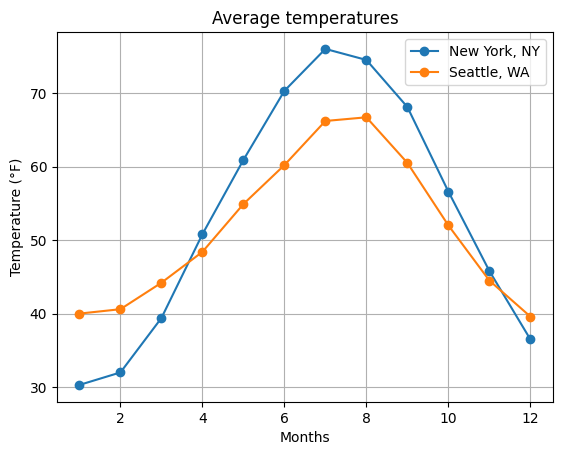

In [6]:
# Monthly temperatures in °F
temp = np.array([
    [30.3,32.0,39.4,50.8,60.9,70.3,76.0,74.5,68.1,56.6,45.8,36.5],  # New York
    [40.0,40.6,44.2,48.4,54.9,60.2,66.2,66.7,60.5,52.0,44.5,39.6]   # Seattle
])

# Write your code below:
months = np.arange(1,13)
plt.plot(months, temp[0,:], marker='o', label='New York, NY')
plt.plot(months, temp[1,:], marker='o', label='Seattle, WA')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Temperature (°F)')
plt.title('Average temperatures')
plt.grid()

### R/V *Rachel Carson* CTD depth profiles

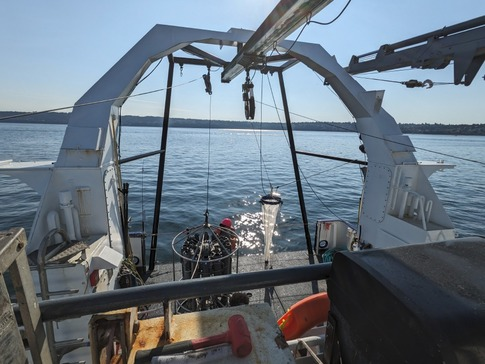

*Image source: Emilio Mayorga, DINO SIP (SURP predecessor) 2024 cruise*

First, let's download two `.csv` data files from Google Drive [here](https://drive.google.com/drive/folders/1Am6XdlB-APQ3ccOvLeGK8DFPQ2OnPeJD?usp=share_link) (we already used the two Rachel Carson files in the previous notebook!). Each file is a conductivity-temperature-depth (CTD) cast that was collected from the ship R/V *Rachel Carson* off of Carkeek Park near Seattle. ***There are 4 csv files on that folders; go ahead and save all 4 to your computer.***

Next, we can upload the files to this Google Colab notebook. ***Click the sidebar folder icon image.png on the left, then use the page-with-arrow icon image.png at the top to select the files and upload them.***

*Note that uploaded files will be deleted from Google Colab when you refresh this notebook!*

We will specify each **filepath** using string variables:

Now, let's plot the ocean CTD profiles measured by the R/V *Rachel Carson*. First we'll read the two CTD csv files using pandas `read_csv`, as we did in the previous notebook.

Let's remind ourselves of what the `pandas` `DataFrame` looks like:

In [7]:
filepath_1 = '/content/2023051001001_Carkeek.csv'
filepath_2 = '/content/2023051101001_Carkeek.csv'

In [8]:
data_1 = pd.read_csv(filepath_1, comment='#')
data_2 = pd.read_csv(filepath_2, comment='#')

# Note: in a notebook, we don't actually need the "display()" function
# to print out a variable (including a DataFrame) with nice formatting
data_1

,Unnamed: 0,index,altM,CStarTr0,c0mS/cm,density00,depSM,latitude,longitude,flECO-AFL,...,sbeox0Mg/L,sbeox0ML/L,ph,potemp090C,prDM,sal00,t090C,scan,nbf,flag
0,0,3407,98.53,71.0825,31.662958,1021.7317,2.101,47.71418,-122.40854,2.8127,...,10.6450,7.4488,9.271,10.2155,2.119,28.3385,10.2157,3408,0,0.0
1,1,3408,98.53,71.0825,31.662061,1021.7317,2.005,47.71418,-122.40854,2.8127,...,10.6446,7.4484,9.271,10.2140,2.022,28.3388,10.2143,3409,0,0.0
2,2,3409,98.53,71.0825,31.661464,1021.7323,2.045,47.71418,-122.40854,2.8127,...,10.6443,7.4483,9.271,10.2129,2.062,28.3391,10.2131,3410,0,0.0
3,3,3410,98.53,71.0825,31.660448,1021.7323,2.005,47.71418,-122.40854,2.8713,...,10.6441,7.4481,9.271,10.2117,2.022,28.3390,10.2119,3411,0,0.0
4,4,3411,98.53,71.0825,31.658416,1021.7325,1.981,47.71418,-122.40854,3.1057,...,10.6443,7.4483,9.271,10.2093,1.998,28.3389,10.2095,3412,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8200,8200,11607,11.99,83.1087,31.920640,1024.1134,173.726,47.71316,-122.40812,0.1753,...,7.0198,4.9120,8.788,8.3719,175.266,30.0190,8.3887,11608,0,0.0
8201,8201,11608,11.99,83.1087,31.920640,1024.1135,173.726,47.71316,-122.40812,0.1753,...,7.0201,4.9123,8.788,8.3717,175.266,30.0191,8.3886,11609,0,0.0
8202,8202,11609,11.99,83.1087,31.920820,1024.1141,173.846,47.71316,-122.40812,0.1753,...,7.0204,4.9125,8.788,8.3718,175.387,30.0191,8.3887,11610,0,0.0
8203,8203,11610,11.99,83.1087,31.920579,1024.1129,173.613,47.71316,-122.40812,0.1753,...,7.0205,4.9125,8.783,8.3719,175.152,30.0190,8.3887,11611,0,0.0


With the tools we have, we can make line plots of temperature vs. depth that include both CTD casts.

In the code below, we explicitly label the x- and y- axes.

Text(0, 0.5, 'Depth (m)')

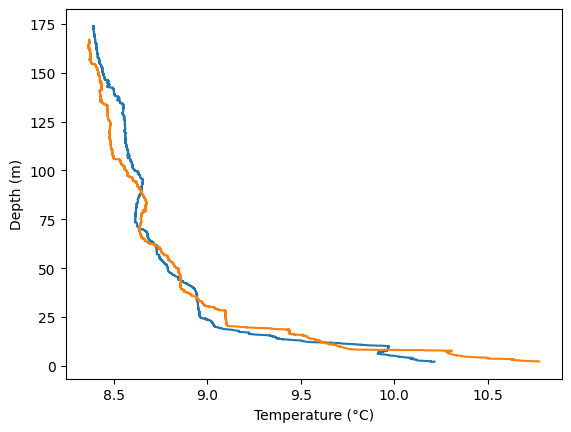

In [9]:
plt.plot(data_1['t090C'], data_1['depSM'])
plt.plot(data_2['t090C'], data_2['depSM'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')

Hmm, it'd be more intuitive to have depth *increasing* from 0 at the top (the surface); and more useful to add a legend that clarifies which cast is which, a plot title and a grid.

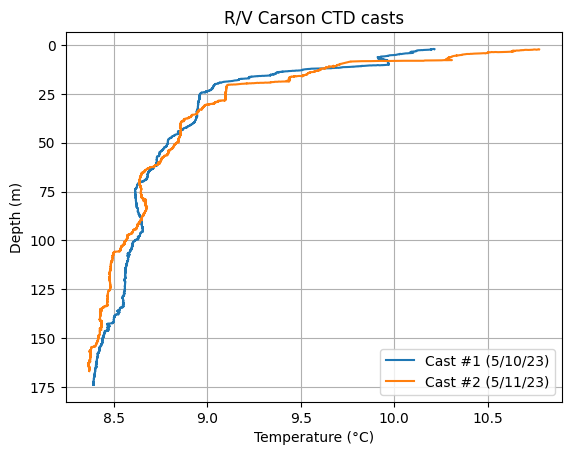

In [10]:
# Temperature vs. depth profile
plt.plot(data_1['t090C'], data_1['depSM'], label='Cast #1 (5/10/23)')
plt.plot(data_2['t090C'], data_2['depSM'], label='Cast #2 (5/11/23)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')

plt.title('R/V Carson CTD casts')
plt.legend()
plt.gca().invert_yaxis()  # This reverses the y-axis. gca stands for "get current axes"
plt.grid()

***Can you try plotting another parameter vs. depth? Note: the file contains salinity (`sal00`), oxygen (`sbeox0Mg/L`), chlorophyll fluorescence (`flECO-AFL`), and pH (`ph`) data.***

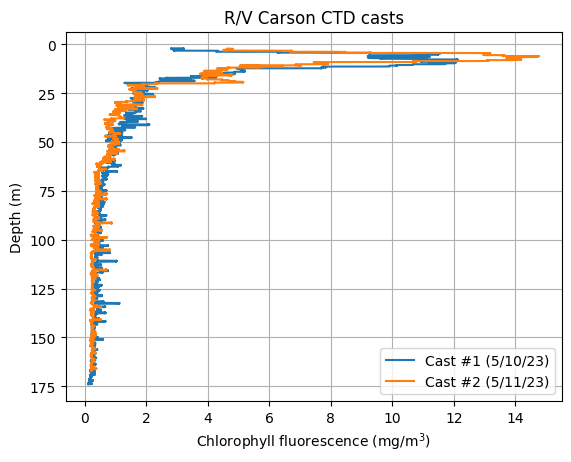

In [11]:
# Write your code here:
plt.figure()
plt.plot(data_1['flECO-AFL'], data_1['depSM'], label='Cast #1 (5/10/23)')
plt.plot(data_2['flECO-AFL'], data_2['depSM'], label='Cast #2 (5/11/23)')
plt.xlabel('Chlorophyll fluorescence (mg/m$^3$)')
plt.ylabel('Depth (m)')
plt.legend()
plt.gca().invert_yaxis()   # This reverses the y-axis
plt.title('R/V Carson CTD casts')
plt.grid()

## Part 2. Exploring ocean time series data from the Seattle Aquarium

Seattle is located in King County. King County's Department of Natural Resources & Parks maintains several ocean measurement stations in Puget Sound. These sensors monitor the water quality and ocean conditions.

One of these stations is at the [Seattle Aquarium](https://www.seattleaquarium.org) on the waterfront in downtown Seattle. The station consists of a mooring with two sensors. Sensor #1 is at a depth of 1 meter, and sensor #2 is at a depth of 10 m.

The mooring data can be obtained from King County here: https://green2.kingcounty.gov/marine-buoy/Data.aspx. However, the data requires a bit of processing before it can be loaded into Python. The data can also be conveniently visualized on the [NANOOS Visualization System](https://nvs.nanoos.org) Data Explorer, [here.](https://nvs.nanoos.org/Explorer?action=oiw:fixed_platform:KC_SEAQYSI)

***You can download the processed data file from Google Drive [here](https://drive.google.com/drive/folders/1Am6XdlB-APQ3ccOvLeGK8DFPQ2OnPeJD?usp=share_link).*** This CSV file, `SeattleAquarium_7_2_2025_to_7_15_2025.csv`, contains data measured every 15 minutes for the two weeks from July 2 to July 15, 2025.

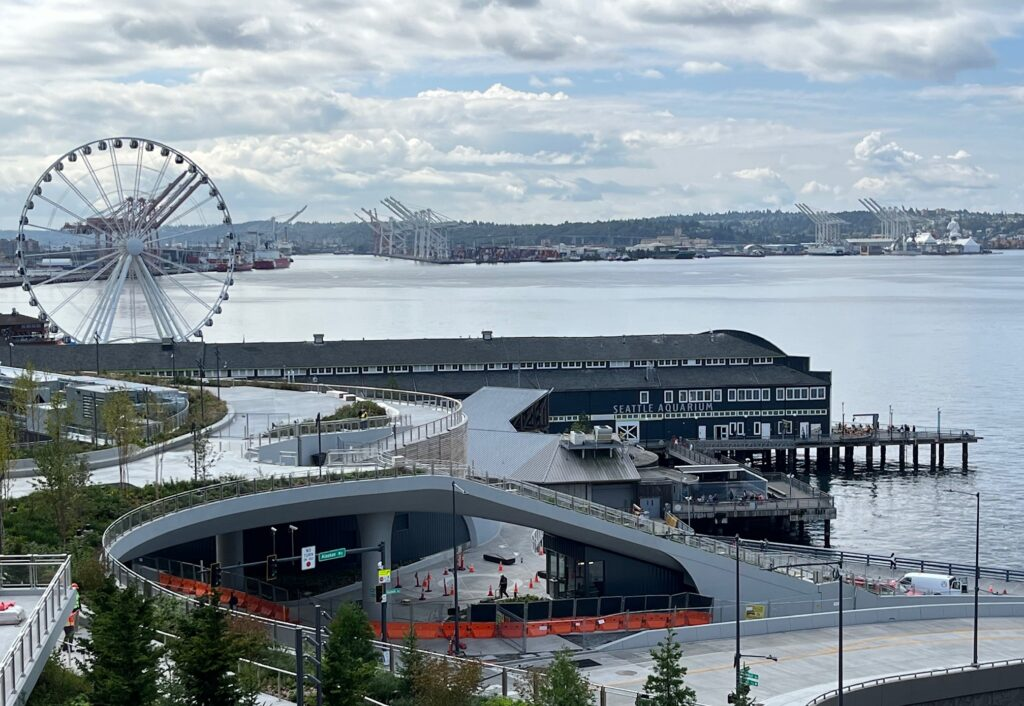

*Image source: [MyEdmondsNews](https://myedmondsnews.com/2024/08/day-trip-discoveries-visit-the-seattle-aquariums-new-ocean-pavilion/)*

The following call to `pd.read_csv()` will load the data file correctly.

The function arguments will ignore comments (`comment='*'`), set the header to the first non-commented row (`header=0`), set the index to the first column (`index_col=0`), interpret that column as datetimes (`parse_dates=True`), and specify the file input encoding (`encoding='unicode_escape'`).

In [12]:
# Run this code to load the data
# When a function uses many arguments, it can be convenient for readability
# to specify each argument assignment in one line, like this:
aqua = pd.read_csv(
    '/content/SeattleAquarium_7_2_2025_to_7_15_2025.csv',
    comment='*',
    header=0,
    index_col=0,
    parse_dates=True,
    encoding='unicode_escape'
)

# .head(n) displays the first n records, where the default is n=5
# .tail(n) diplays the last n records.
aqua.head()

/tmp/ipython-input-2993415281.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aqua = pd.read_csv(


,1_Depth_m,Qual_1_Depth,2_Depth_m,Qual_2_Depth,1_Water_Temperature_degC,Qual_1_Water_Temperature,2_Water_Temperature_degC,Qual_2_Water_Temperature,1_Salinity_PSU,Qual_1_Salinity,...,Qual_2_Sonde_pH,1_Density_kg/m^3,Qual_1_Water_Density,2_Density_kg/m^3,Qual_2_Water_Density,1_Sonde_Batt_V,2_Sonde_Batt_V,Logger_Batt_V,1_Sonde_ID,2_Sonde_ID
Date,,,,,,,,,,,,,,,,,,,,,
2025-07-02 00:00:00,0.852,210,9.799,210,13.415,210,11.443,210,29.021,210,...,210,1021.68965,210,1022.65046,210,11.9,13.8,13.1,NaN,NaN
2025-07-02 00:15:00,0.845,210,9.769,210,13.636,210,11.456,210,28.910,210,...,210,1021.56106,210,1022.63347,210,11.9,13.8,13.1,NaN,NaN
2025-07-02 00:30:00,0.844,210,9.791,210,13.356,210,11.447,210,29.042,210,...,210,1021.71730,210,1022.63654,210,11.9,13.8,13.1,NaN,NaN
2025-07-02 00:45:00,0.865,210,9.811,210,13.274,210,11.422,210,29.080,210,...,210,1021.76240,210,1022.65867,210,11.9,13.8,13.1,NaN,NaN
2025-07-02 01:00:00,0.846,210,9.823,210,13.298,210,11.390,210,29.061,210,...,210,1021.74305,210,1022.67361,210,11.9,13.8,13.1,NaN,NaN


Since Pandas won't display all the column names (there are too many!), we can use the `.columns` attribute to see them:

In [13]:
# Note: we don't need "print()" or "display()" ;)
aqua.columns

Index(['1_Depth_m', 'Qual_1_Depth', '2_Depth_m', 'Qual_2_Depth',
       '1_Water_Temperature_degC', 'Qual_1_Water_Temperature',
       '2_Water_Temperature_degC', 'Qual_2_Water_Temperature',
       '1_Salinity_PSU', 'Qual_1_Salinity', '2_Salinity_PSU',
       'Qual_2_Salinity', '1_Dissolved_Oxygen_%Sat', '1_Dissolved_Oxygen_mg/L',
       'Qual_1_DO', '2_Dissolved_Oxygen_%Sat', '2_Dissolved_Oxygen_mg/L',
       'Qual_2_DO', '1_Chlorophyll_Fluorescence_ug/L',
       'Qual_1_Chlorophyll_Fluorescence', '2_Chlorophyll_Fluorescence_ug/L',
       'Qual_2_Chlorophyll_Fluorescence', '1_Turbidity_NTU',
       'Qual_1_Turbidity', '2_Turbidity_NTU', 'Qual_2_Turbidity', '1_Sonde_pH',
       'Qual_1_Sonde_pH', '2_Sonde_pH', 'Qual_2_Sonde_pH', '1_Density_kg/m^3',
       'Qual_1_Water_Density', '2_Density_kg/m^3', 'Qual_2_Water_Density',
       '1_Sonde_Batt_V', '2_Sonde_Batt_V', 'Logger_Batt_V', '1_Sonde_ID',
       '2_Sonde_ID'],
      dtype='object')

We can also call `.info()` to get even more information about the DataFrame in a nicely formatted presentation:

In [14]:
aqua.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1298 entries, 2025-07-02 00:00:00 to 2025-07-15 13:15:00
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   1_Depth_m                        1298 non-null   float64
 1   Qual_1_Depth                     1298 non-null   int64  
 2   2_Depth_m                        1298 non-null   float64
 3   Qual_2_Depth                     1298 non-null   int64  
 4   1_Water_Temperature_degC         1298 non-null   float64
 5   Qual_1_Water_Temperature         1298 non-null   int64  
 6   2_Water_Temperature_degC         1298 non-null   float64
 7   Qual_2_Water_Temperature         1298 non-null   int64  
 8   1_Salinity_PSU                   1298 non-null   float64
 9   Qual_1_Salinity                  1298 non-null   int64  
 10  2_Salinity_PSU                   1298 non-null   float64
 11  Qual_2_Salinity                  1298 non-null

We learned how to create X-Y line and scatter plots using `plt.plot()` above. However, `Pandas` offers us a shortcut.

You can call `.plot()` on a Pandas Series to generate a line plot. The function arguments include many of those you learned for `plt.plot()`. They can be found in the online documentation: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html.

Pandas `.plot()` offers some advantages. It's simpler to use, and as you'll see it auto-generates axis labels and legends, as needed.

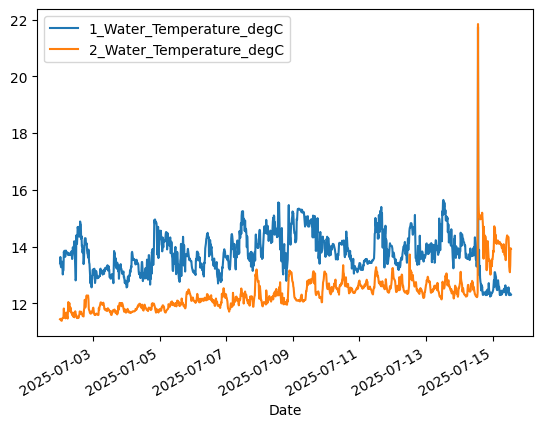

In [15]:
# Plot temperature from upper (1-meter) and lower (10-meter) sensors
aqua['1_Water_Temperature_degC'].plot()  # 1-meter
aqua['2_Water_Temperature_degC'].plot()  # 10-meter
plt.legend()

Note the spike in the temperature data on July 14, and then the apparent switch of the Sensor 1 and Sensor 2 data streams. ***What do you think happened at the Aquarium?***

We'll learn how to use boolean indexing to mask out bad data later. But for now, let's change the y-axis limits to zoom in on the good data.

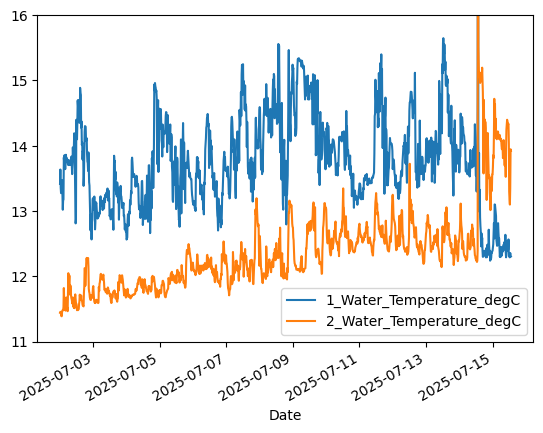

In [16]:
# Plot temperature from upper (1-meter) sensor
aqua['1_Water_Temperature_degC'].plot()
aqua['2_Water_Temperature_degC'].plot()
plt.ylim([11.0,16.0])   # Set y-axis limits to ignore data spike
plt.legend()

### Using timeseries capabilities

We can take advantage of built-in datetime functionality in `Pandas` to examine data at aggregated time intervals, like daily; and to examine *diurnal* variability (within each day).

First let's examine the DataFrame index:

In [17]:
# The DataFrame index has a numpy "datetime64[ns]" data type
aqua.index

DatetimeIndex(['2025-07-02 00:00:00', '2025-07-02 00:15:00',
               '2025-07-02 00:30:00', '2025-07-02 00:45:00',
               '2025-07-02 01:00:00', '2025-07-02 01:15:00',
               '2025-07-02 01:30:00', '2025-07-02 01:45:00',
               '2025-07-02 02:00:00', '2025-07-02 02:15:00',
               ...
               '2025-07-15 11:00:00', '2025-07-15 11:15:00',
               '2025-07-15 11:30:00', '2025-07-15 11:45:00',
               '2025-07-15 12:00:00', '2025-07-15 12:15:00',
               '2025-07-15 12:30:00', '2025-07-15 12:45:00',
               '2025-07-15 13:00:00', '2025-07-15 13:15:00'],
              dtype='datetime64[ns]', name='Date', length=1298, freq=None)

In [18]:
# Extract the date from each datetime value in the index using the .date property
aqua.index.date

array([datetime.date(2025, 7, 2), datetime.date(2025, 7, 2),
       datetime.date(2025, 7, 2), ..., datetime.date(2025, 7, 15),
       datetime.date(2025, 7, 15), datetime.date(2025, 7, 15)],
      dtype=object)

**We can use `.resample()` to resample the DataFrame over a specific time resolution ("1D" = 1 day),** returning the minimum (`.min()`) and maximum (`.max()`) values at the resampled resolution:

In [19]:
aqua_dailymin = aqua.resample("1D", origin='start_day').min()
aqua_dailymax = aqua.resample("1D", origin='start_day').max()

We now have DataFrames with just one record (row) per day!

In [20]:
aqua_dailymin

,1_Depth_m,Qual_1_Depth,2_Depth_m,Qual_2_Depth,1_Water_Temperature_degC,Qual_1_Water_Temperature,2_Water_Temperature_degC,Qual_2_Water_Temperature,1_Salinity_PSU,Qual_1_Salinity,...,Qual_2_Sonde_pH,1_Density_kg/m^3,Qual_1_Water_Density,2_Density_kg/m^3,Qual_2_Water_Density,1_Sonde_Batt_V,2_Sonde_Batt_V,Logger_Batt_V,1_Sonde_ID,2_Sonde_ID
Date,,,,,,,,,,,,,,,,,,,,,
2025-07-02,0.804,210,9.769,210,12.565,210,11.388,210,27.520,210,...,210,1020.44613,210,1022.25050,210,11.7,13.8,13.0,NaN,NaN
2025-07-03,0.862,210,9.816,210,12.683,210,11.590,210,28.036,210,...,210,1020.95768,210,1022.39893,210,11.7,13.8,13.0,NaN,NaN
2025-07-04,0.882,210,9.839,210,12.563,210,11.662,210,27.327,210,...,210,1020.31357,210,1022.34168,210,11.6,13.8,13.0,NaN,NaN
2025-07-05,0.976,210,9.925,210,12.759,210,11.680,210,24.558,210,...,210,1018.04794,210,1022.19333,210,11.3,13.8,13.0,NaN,NaN
2025-07-06,0.912,210,9.872,210,12.702,210,11.840,210,27.261,210,...,210,1020.12523,210,1022.28316,210,11.5,13.8,13.0,NaN,NaN
2025-07-07,0.955,210,9.889,210,13.146,210,11.709,210,27.778,210,...,210,1020.39621,210,1022.06330,210,11.5,13.8,13.0,NaN,NaN
2025-07-08,0.913,210,9.869,210,12.795,210,11.896,210,27.748,210,...,210,1020.40477,210,1021.99987,210,11.5,13.8,13.0,NaN,NaN
2025-07-09,0.926,210,9.902,210,13.398,210,12.038,210,27.377,210,...,210,1020.06360,210,1022.05351,210,11.5,13.8,13.0,NaN,NaN
2025-07-10,0.923,210,9.878,210,13.050,210,12.309,210,27.690,210,...,210,1020.53203,210,1021.83855,210,11.2,13.8,13.0,NaN,NaN


*Look at the large changes in depth for the two sensors, `1_Depth_m` and `2_Depth_m`, starting on July 14!*

Use the resampled daily DataFrames to plot the 1-meter daily minimum and maximum on top of the raw data at the original 15-minute resolution.

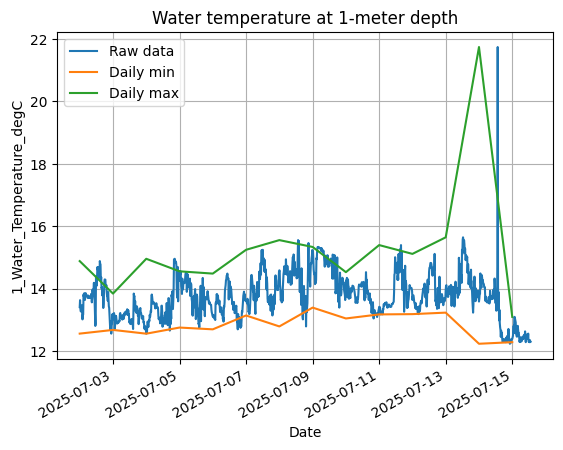

In [21]:
aqua['1_Water_Temperature_degC'].plot(label="Raw data")
aqua_dailymin['1_Water_Temperature_degC'].plot(label="Daily min")
aqua_dailymax['1_Water_Temperature_degC'].plot(label="Daily max")
plt.legend()
plt.ylabel("1_Water_Temperature_degC")
plt.title("Water temperature at 1-meter depth")
plt.grid()

Now let's focus on how temperature varies throughout the day ("diurnally"). First, use the DataFrame index to create an array of *time* values as fractional hours. For example, 12:30 is 12.5. We use the `.hour` and `.minute` properties:

In [22]:
hours_minutes = aqua.index.hour + aqua.index.minute / 60

hours_minutes

Index([  0.0,  0.25,   0.5,  0.75,   1.0,  1.25,   1.5,  1.75,   2.0,  2.25,
       ...
        11.0, 11.25,  11.5, 11.75,  12.0, 12.25,  12.5, 12.75,  13.0, 13.25],
      dtype='float64', name='Date', length=1298)

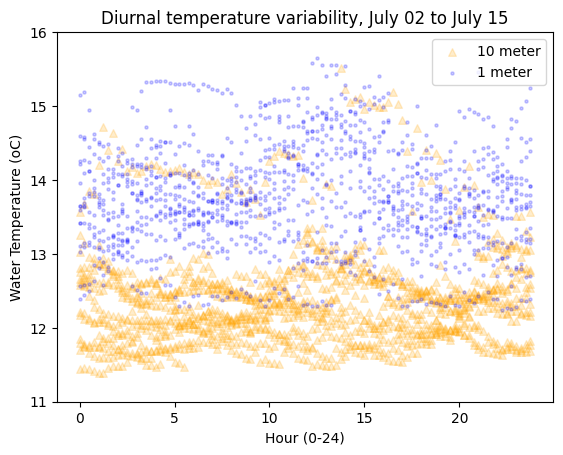

In [23]:
# Plot temperature as a scatter plot
plt.scatter(
    hours_minutes, aqua['2_Water_Temperature_degC'], label='10 meter',
    s=30, c='orange', marker='^', alpha=0.2
)
plt.scatter(
    hours_minutes, aqua['1_Water_Temperature_degC'], label='1 meter',
    s=5, c='blue', marker='o', alpha=0.2
)
plt.ylim([11.0,16.0])   # Set y-axis limits to ignore data spike
plt.xlabel("Hour (0-24)")
plt.ylabel("Water Temperature (oC)")
plt.legend()
plt.title(
    f"Diurnal temperature variability, {aqua.index.min():%B %d} to {aqua.index.max():%B %d}"
);

In the title, we used datetime formatting codes with `f` string formatting. See https://strftime.org and https://www.strfti.me. Here's a simpler example:

In [24]:
f"{aqua.index.min():%B %d}"

'July 02'

The `slice()` function can be convenient for generating indices over an interval. The syntax is:
> **`slice(start, stop, step=None)`**

For example, we can apply a slice on the timeseries DataFrame index to plot 1-meter temperature from the start of the timeseries to July 9. Notice that we use `None` to start at the beginning of the time series and can define a date as a string!

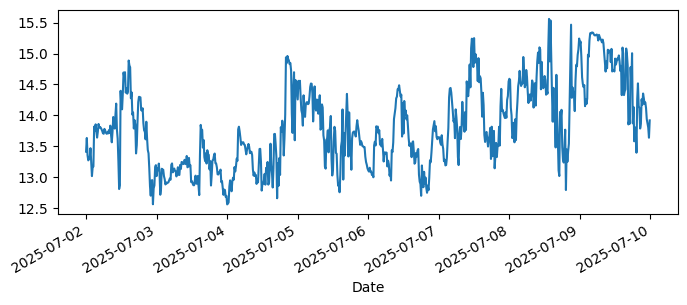

In [25]:
aqua['1_Water_Temperature_degC'].loc[slice(None, '2025-07-09')].plot(
    label="Raw data", figsize=(8,3)
);

### Try exploring the data

***Can you answer some of the following questions by making plots and using the functions you already know?***

*   What was the warmest ocean temperature seen in this data? *(Feel free to slice the data to ignore periods of seemingly incorrect measurements.)*
*   On average, how much colder is the deep (10-meter) sensor than the shallow (1-meter) sensor? *(Feel free to slice the data to ignore periods of seemingly incorrect measurements.)*
*   What day likely had a significant rain event? *(Hint: rain is fresh water, and the ocean is salty.)*
*   What direction is phytoplankton growth trending in over this data period? *(Hint: chlorophyll concentration is a measure of how much phytoplankton are in seawater.)*
*   What is the relationship between near-surface ocean temperature and phytoplankton?
*   Can you plot the mean daily oxygen concentration at 1- and 10-meter depths (the two `Dissolved_Oxygen_mg/L` columns)?

In [26]:
# Warmest ocean temperature
# Note: we are using .loc[slice()] to slice the data in time
# to ignore bad data from July 13 onwards
print(aqua['1_Water_Temperature_degC'].loc[slice(None,'2025-07-13')].max())
print(aqua['2_Water_Temperature_degC'].loc[slice(None,'2025-07-13')].max())

15.648
13.724


In [27]:
# Average temperature difference between shallow and deep sensors
# Note: we are using .loc[slice()] to slice the data in time
# to ignore bad data from July 13 onwards
print(aqua['1_Water_Temperature_degC'].loc[slice(None,'2025-07-13')].mean() -
      aqua['2_Water_Temperature_degC'].loc[slice(None,'2025-07-13')].mean())

1.6307517421602782


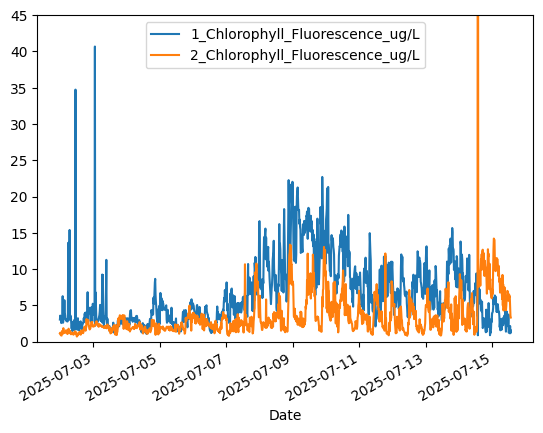

In [28]:
# Phytoplankton growth trend appears to be initially upwards, then downwards after July 9
aqua['1_Chlorophyll_Fluorescence_ug/L'].plot()
aqua['2_Chlorophyll_Fluorescence_ug/L'].plot()
plt.ylim([0.0,45.0])  # Crop y-limits due to data spike
plt.legend()

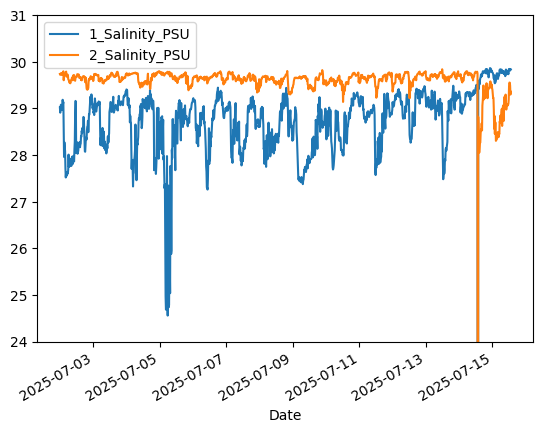

In [29]:
# Ocean salinity reveals a freshening signal on 7/5/25, likely from rain
aqua['1_Salinity_PSU'].plot()
aqua['2_Salinity_PSU'].plot()
plt.ylim([24,31])  # Crop y-limits due to data spike
plt.legend()

Text(0, 0.5, 'Chlorophyll (ug/L)')

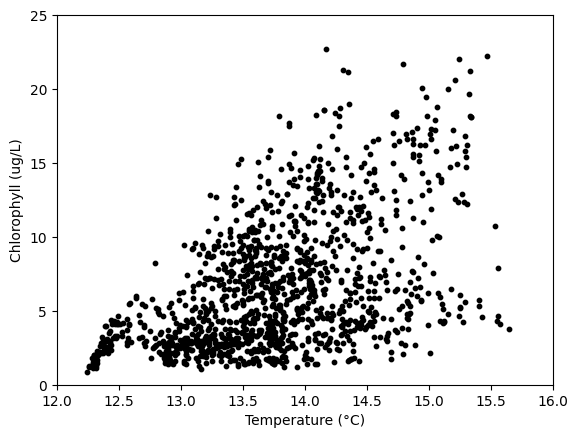

In [30]:
# Relationship between temperature and chlorophyll
# (The amount of phytoplankton seems to increase with warmer
#  near-surface temperatures!)
plt.scatter(aqua['1_Water_Temperature_degC'],
            aqua['1_Chlorophyll_Fluorescence_ug/L'],
            c='k',s=10)
plt.xlim([12.0,16.0])   # Crop axis limits due to incorrect data
plt.ylim([0.0,25.0])
plt.xlabel('Temperature (°C)')
plt.ylabel('Chlorophyll (ug/L)')

<Axes: xlabel='Date'>

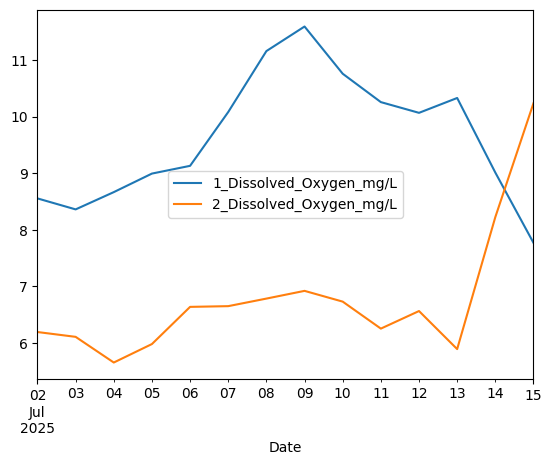

In [31]:
# Mean daily oxygen at 1 and 10 meters
aqua_dailymean = aqua.resample("1D", origin='start_day').mean()
aqua_dailymean[['1_Dissolved_Oxygen_mg/L', '2_Dissolved_Oxygen_mg/L']].plot()

## Part 3: Logical operations

Often, we will want to compare two numbers or variables. We do this using the following **logical operations**:

* `==` : equal
* `!=` : not equal
* `>` : greater than
* `>=` : greater than or equal to
* `<` : less than
* `<=` : less than or equal to
* `and` or `&` : are both booleans true?
* `or` or `|` : is either boolean true?
* `not` or `~` : reverse the boolean (True -> False, False -> True)
* `in` : is a member
* `not in` : is not a member

Each logical operation **evaluates to** (returns) a boolean — `True` or `False`. Consider the following examples:

In [32]:
3 == 3

True

In [33]:
3 == 3.0    # integers can be compared to floating-point numbers

True

In [34]:
not 3 == 3

False

In [35]:
3 == 5

False

In [36]:
3 != 5

True

In [37]:
3 > 5

False

In [38]:
5 <= 5

True

In [39]:
(3 != 5) or (3 > 5)

True

In [40]:
(3 != 5) and (3 > 5)

False

Applying a logical comparison to a NumPy array gives a **boolean array**!

In [41]:
x = np.array([1,2,3,4,5,6])

print(x < 4)
print(x <= 4)

[ True  True  True False False False]
[ True  True  True  True False False]


In [42]:
# Note: "not" can't be applied to an entire boolean array.
# Instead, we have to use "~":
print(~np.array([True, False, True]))

[False  True False]


Note that membership tests work on lists, arrays, and strings:

In [43]:
print(3 in x)      # this is asking: "is 3 in x?"

True


In [44]:
print(7 in x)

False


In [45]:
print(3 not in x)  # this is asking: "is 3 not in x?"

False


In [46]:
print('o w' in 'hello world')

True


In [47]:
print('World' in 'hello world')   # note that string membership is case-sensitive

False


Heads up: this next skill is super powerful. We saw above that applying a logical comparison to an array of numbers gives us a boolean array.

We can use boolean arrays as "**masks**" to select certain elements of an array. This is called **boolean indexing**.

Here are a few ways to use it:

In [48]:
# Here are the pH values from last week's lesson:
pH_measurements = np.array([7.84, 7.91, 8.05, np.nan, 7.96, 8.03])
print('pH measurements:', pH_measurements)

# Remember that we can test for missing data (np.NaN values) using np.isnan():
print('Result of np.isnan():', np.isnan(pH_measurements))

# The resulting boolean array can be used to extract only the valid data:
print('Array after removing missing data:', pH_measurements[~np.isnan(pH_measurements)])

pH measurements: [7.84 7.91 8.05  nan 7.96 8.03]
Result of np.isnan(): [False False False  True False False]
Array after removing missing data: [7.84 7.91 8.05 7.96 8.03]


In [49]:
# Let's revisit the Seattle temperatures from earlier:
seattle_temps = np.array([40.0,40.6,44.2,48.4,54.9,60.2,66.2,66.7,60.5,52.0,44.5,39.6])

# Applying a logical comparison creates a boolean array, or "mask":
print(seattle_temps > 60)

[False False False False False  True  True  True  True False False False]


In [50]:
# Now let's use the mask to retrieve only the elements where the mask is True:
seattle_temps[seattle_temps > 60]

# Note: this only works when the mask is the same length as the array!

array([60.2, 66.2, 66.7, 60.5])

In [51]:
# The boolean indexing gives the same result as specifying the actual array indices:
seattle_temps[[5,6,7,8]]

array([60.2, 66.2, 66.7, 60.5])

We can use boolean indexing to handle the data outlier in the Seattle Aquarium time series! Let's apply the threshold of 16°C we used earlier to set values as "missing", `np.nan`. To do this, we'll use the extended `.loc[]` syntax to *assign* a value to a column based on a criteria:

> **`dataframe.loc[BOOLEAN_ARRAY, COLUMN_NAME] = NEW_VALUE`**

In [52]:
aqua.loc[aqua['1_Water_Temperature_degC'] > 16, '1_Water_Temperature_degC'] = np.nan
aqua.loc[aqua['2_Water_Temperature_degC'] > 16, '2_Water_Temperature_degC'] = np.nan

Now redo the plot we did earlier. No need to clip the y axis range anymore! But the data still seem to switchover between the two sensors ...

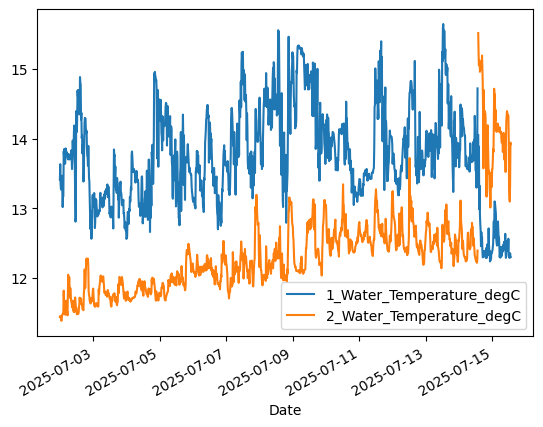

In [53]:
aqua['1_Water_Temperature_degC'].plot()  # 1-meter
aqua['2_Water_Temperature_degC'].plot()  # 10-meter
plt.legend()

***How many months of the year is Seattle 40°F or colder? Try using boolean indexing and a function that you've learned to calculate and print the answer:***

In [54]:
# Write your code here:
len(seattle_temps[seattle_temps > 40])


10